## Dependencias

In [1]:
from sas7bdat import SAS7BDAT
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura de datos

In [2]:
ruta = r'C:\Users\Jesús Camacho\Desktop\sas_municipios'

# Lista para almacenar los DataFrames de los archivos SAS
dataframes = []

for archivo in os.listdir(ruta):
    if archivo.endswith(".sas7bdat"):
        archivo_path = os.path.join(ruta, archivo)
        
        with SAS7BDAT(archivo_path) as file:
            df = file.to_data_frame()
            dataframes.append(df)

In [3]:
len(dataframes)

32

Guardamos en una lista el nombre de cada municipio con su número de municipios

In [39]:
aux = []
for i in range(32):
    aux.append([dataframes[i]["NOM_ENT"].unique()[0],len(dataframes[i]["MUN"].unique())])

In [40]:
aux

[['Aguascalientes', 11],
 ['Baja California', 5],
 ['Baja California Sur', 5],
 ['Campeche', 11],
 ['Coahuila de Zaragoza', 38],
 ['Colima', 10],
 ['Chiapas', 118],
 ['Chihuahua', 67],
 ['Distrito Federal', 16],
 ['Durango', 39],
 ['Guanajuato', 46],
 ['Guerrero', 81],
 ['Hidalgo', 84],
 ['Jalisco', 125],
 ['Mxico', 125],
 ['Michoacn de Ocampo', 113],
 ['Morelos', 33],
 ['Nayarit', 20],
 ['Nuevo Len', 51],
 ['Oaxaca', 570],
 ['Puebla', 217],
 ['Quertaro', 18],
 ['Quintana Roo', 9],
 ['San Luis Potos', 58],
 ['Sinaloa', 18],
 ['Sonora', 72],
 ['Tabasco', 17],
 ['Tamaulipas', 43],
 ['Tlaxcala', 60],
 ['Veracruz de Ignacio de la Llave', 212],
 ['Yucatn', 106],
 ['Zacatecas', 58]]

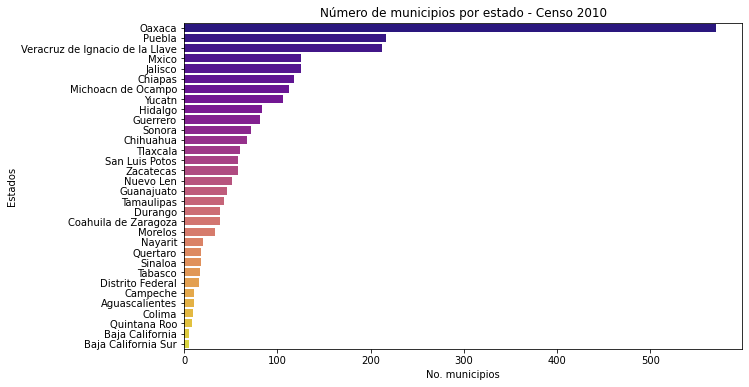

In [58]:
df = pd.DataFrame(aux, columns=['Estado', 'No. municipios'])

df = df.sort_values(by='No. municipios', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='No. municipios', y='Estado', data=df, palette='plasma')
plt.xlabel('No. municipios')
plt.ylabel('Estados')
plt.title('Número de municipios por estado - Censo 2010')
plt.show()

Acceso a la alimentación (¿alguna vez se quedaron sin comida?) - SINCOMER

- Sí	1
- No	2
- No especificado	9


In [83]:
oaxaca = dataframes[19]
puebla = dataframes[20]
veracruz = dataframes[29]
top_3_municipios = [oaxaca, puebla, veracruz]
nombres_estados = ['Oaxaca', 'Puebla', 'Veracruz']

<Figure size 864x432 with 0 Axes>

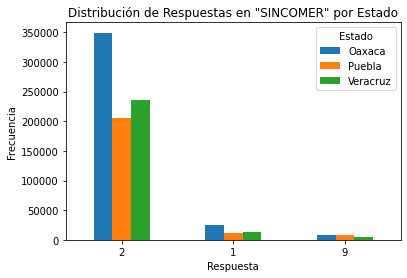

In [85]:
conteo_total = {}

for estado, df in zip(nombres_estados, top_3_municipios):
    # Conteo de respuestas
    conteo = df['SINCOMER'].value_counts()
    
    # Almacenamos el conteo en el diccionario usando el nombre del estado como clave
    conteo_total[estado] = conteo

# Pasamos el diccionario a un DataFrame
conteo_total_df = pd.DataFrame(conteo_total)

# Creamos un gráfico de barras para mostrar los conteos de todas las respuestas juntas
plt.figure(figsize=(12, 6))
conteo_total_df.plot(kind='bar', rot=0)
plt.title('Distribución de respuestas en "SINCOMER" por Estado')
plt.xlabel('Respuesta')
plt.ylabel('Frecuencia')
plt.legend(title='Estado')
plt.show()

Clase de vivienda particular (CLAVIVP)

- Casa independiente	1
- Departamento en edificio	2
- Vivienda en vecindad	3
- Vivienda en cuarto de azotea	4
- Local no construido para habitación	5
- Vivienda móvil	6
- Refugio	7
- No especificado	9
- Blanco por pase	b

In [90]:
for estado, df in zip(nombres_estados, top_3_municipios):
    print(f"Estado: {estado} - Moda_CLAVIVP: {df['CLAVIVP'].mode()[0]}")

Estado: Oaxaca - Moda_CLAVIVP: 1
Estado: Puebla - Moda_CLAVIVP: 1
Estado: Veracruz - Moda_CLAVIVP: 1


In [106]:
oaxaca_serie = oaxaca.value_counts('CLAVIVP')
puebla_serie = puebla.value_counts('CLAVIVP')
veracruz_serie = veracruz.value_counts('CLAVIVP')

In [107]:
df_resp_CLAVIVP = pd.DataFrame({'Oaxaca': oaxaca_serie, 'Puebla': puebla_serie, 'Veracruz': veracruz_serie})

In [110]:
df_resp_CLAVIVP

,Oaxaca,Puebla,Veracruz
CLAVIVP,,,
1,376962,216324,248648
2,600,3178,1574
3,1587,2622,2244
4,116,71,115
5,44,70,74
6,16,9,18
7,36,24,12
9,2303,1715,1489
